In [17]:
import pandas as pd
import glob

# Create an empty DataFrame to store the merged data
master = pd.DataFrame()

# Specify the folder where your CSV files are located
folder_path = '../scrape_data/'

# Use glob to get a list of CSV files in the folder
csv_files = glob.glob(f"{folder_path}/*.csv")

# Loop through the CSV files and read and append the data to the merged DataFrame
for csv_file in csv_files:
    # Extract the category name from the CSV file name
    category = csv_file.split('/')[-1].split('_')[0]
    
    df = pd.read_csv(csv_file)
    
    # Add a 'category' column with the category name
    df['category'] = category
    
    master = master.append(df, ignore_index=True)

# Save the merged data to a new CSV file
master.to_csv("../scrape_data/master/master.csv", index=False)



/var/folders/f2/ty6sgcw911g2_3vqhhq561vm0000gn/T/ipykernel_51890/2147863282.py:23: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

/var/folders/f2/ty6sgcw911g2_3vqhhq561vm0000gn/T/ipykernel_51890/2147863282.py:23: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

/var/folders/f2/ty6sgcw911g2_3vqhhq561vm0000gn/T/ipykernel_51890/2147863282.py:23: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

/var/folders/f2/ty6sgcw911g2_3vqhhq561vm0000gn/T/ipykernel_51890/2147863282.py:23: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

/var/folders/f2/ty6sgcw911g2_3vqhhq561vm0000gn/T/ipykernel_51890/2147863282.py:23: FutureWarning:

The frame.append method is de

In [18]:
import pandas as pd
df = pd.read_csv('../scrape_data/master/master.csv')

In [19]:
df.head()

,asin,title,price,rating,num_reviews,img_link,category
0,B07Y53N2GW,"Beautural Quitapelusas Electrico de Ropa, Remo...",27.99,4.5,5.142,https://images-eu.ssl-images-amazon.com/images...,kitchen
1,B00E3862DE,Philips Domestic Appliances GC026/00 Quitapelu...,10.44,4.6,111.704,https://images-eu.ssl-images-amazon.com/images...,kitchen
2,B0BPYVNW3L,Cecotec Freidora sin Aceite 6 L de Aire Calien...,69.00,4.5,5.505,https://images-eu.ssl-images-amazon.com/images...,kitchen
3,B00MFEHQMO,Rowenta Comfort Compact SO2320 - Calefactor 20...,41.99,4.3,21.671,https://images-eu.ssl-images-amazon.com/images...,kitchen
4,B07YFPZTY6,Cecotec Microondas ProClean 2010. 700 W de Pot...,49.90,4.0,14.613,https://images-eu.ssl-images-amazon.com/images...,kitchen


In [20]:
df.price.mean()

37.56202875898719

In [21]:
df['num_reviews'] = df['num_reviews'].str.replace('.', '').astype(int)


/var/folders/f2/ty6sgcw911g2_3vqhhq561vm0000gn/T/ipykernel_51890/3749287162.py:1: FutureWarning:

The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.



In [22]:
df.num_reviews.mean()

9631.984057517975

In [23]:
df.rating.mean()

4.279212253829322

In [24]:
df.price.median()

16.99

In [11]:
df.describe()

,price,rating,num_reviews
count,3199.000000,3199.000000,3.199000e+03
mean,37.562029,4.279212,9.631984e+03
std,72.909298,0.844322,5.243950e+04
min,0.000000,0.000000,0.000000e+00
25%,9.295000,4.300000,1.162000e+03
50%,16.990000,4.500000,3.030000e+03
75%,31.975000,4.600000,7.190000e+03
max,1029.000000,5.000000,1.369803e+06


In [12]:
import plotly.express as px

# Assuming 'df' is your DataFrame, and you have a 'category' column and a 'price' column.
# Calculate the mean price for each category.
category_mean_prices = df.groupby('category')['price'].median().sort_values(ascending=False)

# Create a Plotly figure
fig = px.bar(
    x=category_mean_prices.index,
    y=category_mean_prices.values,
    labels={'x': 'Categories', 'y': 'Mean Price (EUR)'},
    title='Bar Chart of Mean Prices by Category',
)

# Add tooltips for each bar
fig.update_traces(text=category_mean_prices.values, texttemplate='%{text:.2f}', textposition='outside')

# Set the figure size (optional)
fig.update_layout(width=800, height=600)

# Show the interactive chart
fig.show()


In [14]:
import plotly.express as px

# Assuming 'df' is your DataFrame, and you have a 'category' column and a 'price' column.
# Calculate the mean price for each category.
category_mean_prices = df.groupby('category')['price'].mean().sort_values(ascending=False)

# Create a Plotly figure
fig = px.bar(
    x=category_mean_prices.index,
    y=category_mean_prices.values,
    labels={'x': 'Categories', 'y': 'Mean Price (EUR)'},
    title='Bar Chart of Mean Prices by Category',
)

# Add tooltips for each bar
fig.update_traces(text=category_mean_prices.values, texttemplate='%{text:.2f}', textposition='outside')

# Set the figure size (optional)
fig.update_layout(width=800, height=600)

# Show the interactive chart
fig.show()

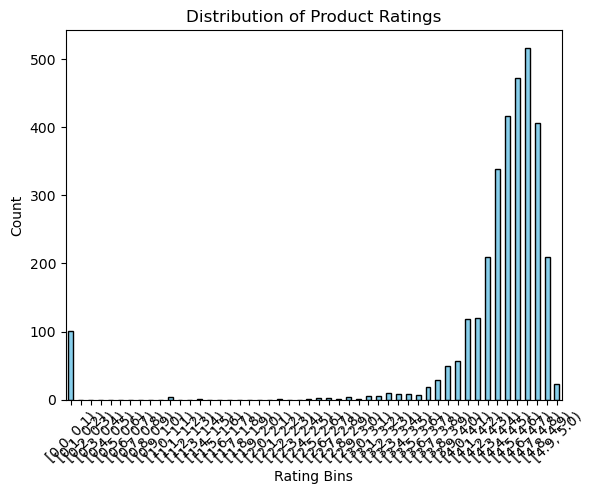

In [24]:
import pandas as pd
import matplotlib.pyplot as plt

# Create bins of width 0.5 for the 'Rating' column
bins = [i/10 for i in range(0, 51)]  # Creates bins from 0.0 to 5.0 in increments of 0.1

# Use the cut function to distribute ratings into bins
df['Rating Bins'] = pd.cut(df['rating'], bins, right=False)

# Group the data by 'Rating Bins' and count the number of products in each bin
bin_counts = df['Rating Bins'].value_counts().sort_index()

# Create a bar plot to visualize the distribution
bin_counts.plot(kind='bar', color='skyblue', edgecolor='black')
plt.xlabel('Rating Bins')
plt.ylabel('Count')
plt.title('Distribution of Product Ratings')
plt.xticks(rotation=45)  # Rotate x-axis labels for better visibility

plt.show()


In [16]:
df.price.median()

16.99

In [42]:
top_10_rows = df.nlargest(10, 'num_reviews')
top_10_rows

,asin,title,price,rating,num_reviews,img_link,category
2708,B00NTCHCU2,"Amazon Basics Pilas alcalinas AAA de 1,5 volti...",7.66,4.5,1369803,https://images-eu.ssl-images-amazon.com/images...,electronics
2711,B00LH3DMUO,"Amazon Basics Pilas alcalinas AAA de 1,5 volti...",12.18,4.5,1369803,https://images-eu.ssl-images-amazon.com/images...,electronics
2713,B00NTCH52W,"Amazon Basics Pilas alcalinas AA de 1,5 voltio...",9.28,4.5,1369803,https://images-eu.ssl-images-amazon.com/images...,electronics
2755,B00MNV8E0C,"Amazon Basics Pilas alcalinas AA de 1,5 voltio...",15.07,4.5,1369803,https://images-eu.ssl-images-amazon.com/images...,electronics
1232,B0014C5S7S,"Crocs Classic Clogs (Best Sellers), Zuecos Uni...",33.99,4.7,465743,https://images-eu.ssl-images-amazon.com/images...,fashion
2732,B00CWNMXQW,"Amazon Basics - Pilas AAA recargables, precarg...",11.39,4.5,296375,https://images-eu.ssl-images-amazon.com/images...,electronics
2778,B07NWWLP5S,Amazon Basics - Pilas recargables AA (paquete ...,16.41,4.5,296375,https://images-eu.ssl-images-amazon.com/images...,electronics
2783,B00CWNMV4G,"Amazon Basics - Pilas AA recargables, precarga...",13.12,4.5,296375,https://images-eu.ssl-images-amazon.com/images...,electronics
614,B00BX5FOCK,SanDisk 64 GB Cruzer Blade USB 2.0 Flash Drive...,5.38,4.6,259468,https://images-eu.ssl-images-amazon.com/images...,computers
663,B00RM1EC1S,SanDisk 128GB Cruzer Blade USB 2.0 Flash Drive,10.99,4.6,259468,https://images-eu.ssl-images-amazon.com/images...,computers


In [29]:
top_10_rows = df.nlargest(10, 'price')
top_10_rows

,asin,title,price,rating,num_reviews,img_link,category
172,B0BNNZZKFW,Apple iPhone 14 Pro (256 GB) - Morado Oscuro (...,1029.00,3.6,70,https://images-eu.ssl-images-amazon.com/images...,amazon-renewed
183,B0BNM3T29W,Apple iPhone 14 Plus (256 GB) - Blanco Estrell...,824.00,3.3,80,https://images-eu.ssl-images-amazon.com/images...,amazon-renewed
113,B09MJRVS68,"Apple iPhone 13 Pro Max, 128GB, Azul alpino - ...",799.00,4.0,600,https://images-eu.ssl-images-amazon.com/images...,amazon-renewed
133,B09G9G48DW,Apple iPhone 13 Mini (128 GB) - en Medianoche,789.00,4.6,2681,https://images-eu.ssl-images-amazon.com/images...,amazon-renewed
157,B0BNM2KK4R,Apple iPhone 14 (128 GB) - Azul (Reacondicionado),739.00,4.3,260,https://images-eu.ssl-images-amazon.com/images...,amazon-renewed
122,B09MJR5TDJ,"Apple iPhone 13 Pro, 128GB, Grafito - (Reacond...",728.00,4.1,3450,https://images-eu.ssl-images-amazon.com/images...,amazon-renewed
104,B09G98HVFS,Apple iPhone 13 (128 GB) - Rosa,699.00,4.7,9686,https://images-eu.ssl-images-amazon.com/images...,amazon-renewed
2945,B0C3WBJX4F,"Garmin fēnix ​​7 Pro Solar, Reloj GPS Multidep...",611.99,4.6,2295,https://images-eu.ssl-images-amazon.com/images...,sports
116,B08PCCKHJM,"Apple iPhone 12 Pro Max, 128GB, Azul Pacifico ...",599.00,4.2,2001,https://images-eu.ssl-images-amazon.com/images...,amazon-renewed
106,B09MJTKXY8,"Apple iPhone 13, 128GB, Azul - (Reacondicionado)",575.00,3.9,2960,https://images-eu.ssl-images-amazon.com/images...,amazon-renewed
